# Hands-on introduction to ML training
In this notebook we will take the same problem as last lesson and try to improve the accuracy.

In this lesson, we will also learn about a technique called feature engineering.

### Step 1: Load and explore data
The first step is figuring out the data source. In this case we will use a pre-existing dataset. We will:
1. Create a folder 'data'
2. Download the file from public github repo using python package "requests" and save the SAT_GPA.csv file in the data folder.

In [1]:
%config IPCompleter.greedy=True #Helps with auto-complete

import numpy as np
import pandas as pd
import os

try:
    os.mkdir('data')
except OSError as error:
    print(error)

import requests, csv

url = 'https://raw.githubusercontent.com/techno-nerd/ML_Course/main/02%20Regression/data/SAT_GPA.csv'
r = requests.get(url)
with open('data/SAT_GPA.csv', 'w') as f:
  writer = csv.writer(f)
  for line in r.iter_lines():
    writer.writerow(line.decode('utf-8').split(','))

[Errno 17] File exists: 'data'


In [2]:
data = pd.read_csv('data/SAT_GPA.csv')

Explore the data

In [3]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181 entries, 0 to 180
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   SAT Score  181 non-null    int64  
 1   GPA        181 non-null    float64
dtypes: float64(1), int64(1)
memory usage: 3.0 KB
None


In [4]:
print(data[:5])

   SAT Score  GPA
0       1600  4.0
1       1593  4.0
2       1587  4.0
3       1580  4.0
4       1573  4.0


Visualise the Data

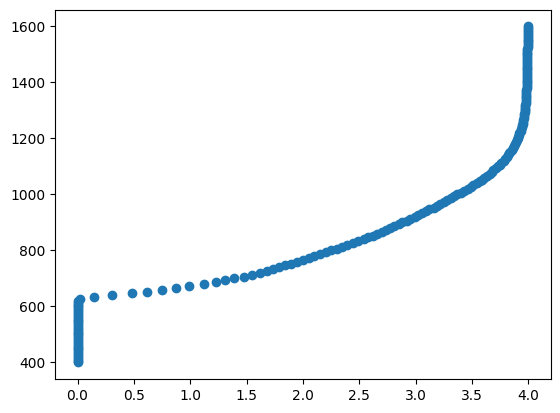

In [5]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.scatter(data['GPA'], data['SAT Score'])
plt.show()

In `GPA_SAT.ipynb` we tried a polynomial trend. Let us try an exponential one now.

### Step 2: Data preparation and feature engineering

Now, we are going to add the features e<sup>GPA</sup>

I am using e (Euler's number), but you can use 2 or any other positive number > 1 if you are more comfortable with it.

Then, we will split the data the same way as last time:
1. Split the data (181 rows) into training set (80%) and test set (20%)
2. Separate the input features ("GPA") from target variable ("SAT Score")

In [6]:
#New feature: e^GPA
import math

exp_gpa = math.e**data['GPA']
print(exp_gpa[:2])

0    54.59815
1    54.59815
Name: GPA, dtype: float64


In [7]:
#Split the data
import sklearn.model_selection as ms

train_features, test_features, train_labels, test_labels = ms.train_test_split(exp_gpa, data['SAT Score'], test_size=0.2)
print(train_features.shape)
print(test_features.shape)
print(train_labels.shape)
print(test_labels.shape)

(144,)
(37,)
(144,)
(37,)


Since the shape is (144,) and (37,) for the features, it needs to be reshaped

In [8]:
try:
    train_features = train_features.to_numpy()
    test_features = test_features.to_numpy()
except:
    pass

train_features = train_features.reshape((-1, 1))
test_features = test_features.reshape((-1, 1))

print(train_features.shape)
print(test_features.shape)

(144, 1)
(37, 1)


### Step 3: Model Selection and Training

We will use one of the simplest ML model for this problem: Linear Regression. 

Although technically this is a linear relationship, it actually resembles: y = a(e<sup>x</sup>) + b because our input feature is e<sup>x</sup>

In [9]:
#Train the model
from sklearn import linear_model as lm

regr = lm.LinearRegression()
regr = regr.fit(train_features, train_labels)

That's it! Model Trained!

In [10]:
#Evaluate the performance
from sklearn.metrics import mean_squared_error as mse

train_predictions = regr.predict(train_features)

print("TRAIN Root Mean Squared Error: %.2f" % 
      (mse(train_labels, train_predictions)**0.5))

TRAIN Root Mean Squared Error: 90.53


### Step 4: Model evaluation and tuning
The error reported above is based on the training set, which is NOT a good indicator of model performance.

Goal of model training to learn from the data and do well on unseen values. This is where the Test set will come in.

In [11]:
test_predictions = regr.predict(test_features)

print("TEST Root Mean Squared Error: %.2f"
      % (mse(test_labels, test_predictions)**0.5))

TEST Root Mean Squared Error: 91.61


This error seems acceptable since train and test error is similar

In [14]:
#This means your final result can be +- error

#Try it yourself (replace 3.94 with your GPA):

gpa = 3.94
user_features = [[math.e**gpa]]
SAT_pred = int(regr.predict(user_features))
print(SAT_pred)

1351


/tmp/ipykernel_2094/1208491923.py:7: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  SAT_pred = int(regr.predict(user_features))


## Model Visualisation

Instead of dealing with the coefficients and creating the formula, we are going to simply plot the predictions vs the actual.

In [18]:
pred = regr.predict(exp_gpa.values.reshape([-1, 1]))

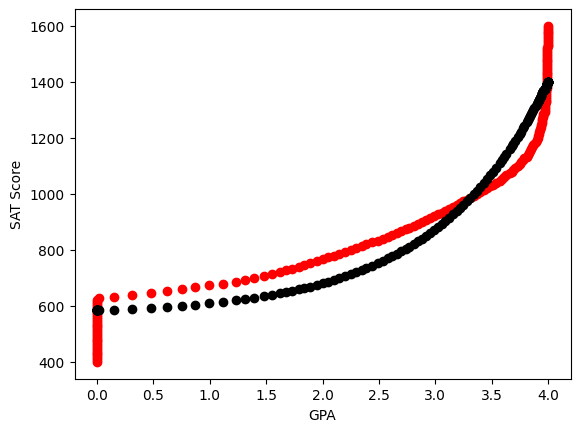

In [20]:
plt.scatter(data['GPA'], data['SAT Score'], color='red')
plt.scatter(data['GPA'], pred, color='black')
plt.xlabel('GPA')
plt.ylabel('SAT Score')

plt.show()

#Black line plots the predictions
#Red line shows the actual values

For comparison, here is the performance from the model trained last lesson:

![Output Graph](https://raw.githubusercontent.com/techno-nerd/ML_Course/main/02%20Regression/resources/ModelPerf.png)

### Explore further

Now, try other bases instead of e. How about 2<sup>GPA</sup> or 10<sup>GPA</sup><br>
Compare the performance all the other features you have looked at so far